In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Import our input dataset
ny_df = pd.read_csv('column_listings_df.csv')
ny_df.head()

,listing_id,listing_url,name,host_id,host_url,host_name,host_since,host_is_superhost,host_listings_count,host_total_listings_count,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,52702018,https://www.airbnb.com/rooms/52702018,Rental unit in Queens · ★4.90 · 1 bedroom · 2 ...,93231383,https://www.airbnb.com/users/show/93231383,Daniel,2016-09-03,t,3.0,3.0,...,2023-08-21,4.90,4.95,4.90,4.95,4.94,4.85,4.87,3,8.53
1,784969376930125242,https://www.airbnb.com/rooms/784969376930125242,Home in Queens · ★4.97 · 3 bedrooms · 4 beds ·...,93231383,https://www.airbnb.com/users/show/93231383,Daniel,2016-09-03,t,3.0,3.0,...,2023-08-15,4.97,4.97,4.97,4.95,4.95,4.84,4.87,3,4.47
2,9919728,https://www.airbnb.com/rooms/9919728,Townhouse in Queens · ★4.33 · 3 bedrooms · 7 b...,50997424,https://www.airbnb.com/users/show/50997424,Mark,2015-12-10,f,10.0,10.0,...,2020-02-18,4.33,4.17,4.33,4.83,4.67,4.83,4.33,7,0.09
3,53696990,https://www.airbnb.com/rooms/53696990,Vacation home in Queens · Studio · 2 beds · 1 ...,50997424,https://www.airbnb.com/users/show/50997424,Mark,2015-12-10,f,10.0,10.0,...,2022-09-16,4.00,4.00,3.00,5.00,4.00,5.00,3.00,7,0.08
4,9920363,https://www.airbnb.com/rooms/9920363,Townhouse in Queens · ★4.25 · 5 bedrooms · 11 ...,50997424,https://www.airbnb.com/users/show/50997424,Mark,2015-12-10,f,10.0,10.0,...,2020-01-01,4.25,4.25,3.75,4.75,4.00,4.75,4.50,7,0.09


In [3]:
ny_df.columns

Index(['listing_id', 'listing_url', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [4]:
ny_df=ny_df[['latitude','longitude','host_is_superhost','neighbourhood_cleansed','review_scores_communication','review_scores_cleanliness','host_total_listings_count','number_of_reviews','review_scores_accuracy', 'neighbourhood_group_cleansed','bathrooms_text','beds','review_scores_rating','price']]
ny_df=pd.get_dummies(ny_df, columns=['neighbourhood_group_cleansed','host_is_superhost','neighbourhood_cleansed'], prefix=['neighbourhood_group_cleansed','host_is_superhost','neighbourhood_cleansed'])

ny_df['price']= ny_df['price'].str.extract('(\d+\.\d+|\d+)').astype(float)
ny_df['bathrooms_text']= ny_df['bathrooms_text'].str.extract('(\d+\.\d+|\d+)').astype(float)
ny_df = ny_df[ny_df['price'] <= 1000]
ny_df.head(3)

,latitude,longitude,review_scores_communication,review_scores_cleanliness,host_total_listings_count,number_of_reviews,review_scores_accuracy,bathrooms_text,beds,review_scores_rating,...,neighbourhood_cleansed_Upper East Side,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Vinegar Hill,neighbourhood_cleansed_Washington Heights,neighbourhood_cleansed_West Village,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodside
0,40.769110,-73.870530,4.94,4.90,3.0,188,4.95,1.0,2.0,4.90,...,0,0,0,0,0,0,0,0,0,0
1,40.768176,-73.871263,4.95,4.97,3.0,38,4.97,1.0,4.0,4.97,...,0,0,0,0,0,0,0,0,0,0
2,40.717340,-73.878050,4.67,4.33,10.0,8,4.17,1.0,7.0,4.33,...,0,0,0,0,0,0,0,0,0,0


In [5]:
ny_df = ny_df.dropna()

In [6]:
y = ny_df['price']
X = ny_df.drop(['price'], axis=1)

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [8]:
train_data=X_train.join(y_train)

In [9]:
train_data

,latitude,longitude,review_scores_communication,review_scores_cleanliness,host_total_listings_count,number_of_reviews,review_scores_accuracy,bathrooms_text,beds,review_scores_rating,...,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Vinegar Hill,neighbourhood_cleansed_Washington Heights,neighbourhood_cleansed_West Village,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodside,price
1693,40.60018,-74.006211,5.00,5.00,2.0,1,5.00,1.5,1.0,5.00,...,0,0,0,0,0,0,0,0,0,108.0
4382,40.70869,-74.006890,5.00,5.00,17.0,1,5.00,1.0,1.0,5.00,...,0,0,0,0,0,0,0,0,0,303.0
24375,40.63879,-73.965780,5.00,5.00,1.0,1,5.00,1.0,2.0,5.00,...,0,0,0,0,0,0,0,0,0,150.0
2714,40.58252,-73.959730,4.97,4.75,7.0,36,4.92,2.0,1.0,4.89,...,0,0,0,0,0,0,0,0,0,89.0
9625,40.71944,-73.982150,4.82,4.91,2.0,11,5.00,1.0,1.0,4.91,...,0,0,0,0,0,0,0,0,0,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15943,40.78360,-73.952210,5.00,4.40,74.0,5,5.00,1.0,2.0,4.80,...,0,0,0,0,0,0,0,0,0,94.0
3765,40.67846,-73.912220,4.52,4.00,19.0,21,4.48,1.0,3.0,4.43,...,0,0,0,0,0,0,0,0,0,380.0
23081,40.80204,-73.964810,4.73,4.13,2.0,16,4.80,1.0,1.0,4.33,...,1,0,0,0,0,0,0,0,0,86.0
25175,40.75962,-73.968060,4.85,4.80,9.0,40,4.83,1.0,1.0,4.83,...,0,0,0,0,0,0,0,0,0,263.0


<Axes: xlabel='latitude', ylabel='longitude'>

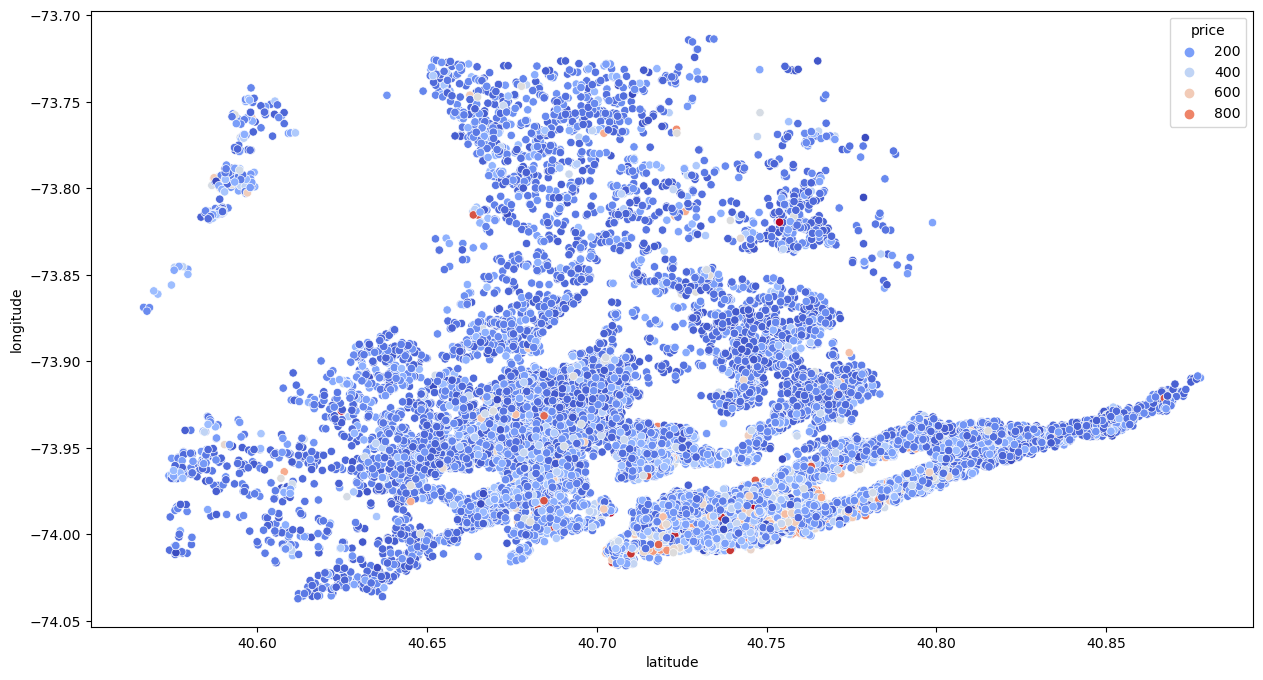

In [10]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='price', palette='coolwarm')

LogisticRegression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [12]:
X_train, y_train = ny_df.drop(['price','latitude','longitude'],axis=1), ny_df['price']
X_test, y_test = ny_df.drop(['price','latitude','longitude'],axis=1), ny_df['price']

reg = LinearRegression()

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
r2_1 = r2_score(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"R-squared (R2) Score: {r2_1}")

Root Mean Squared Error (RMSE): 112.872511904683
R-squared (R2) Score: 0.32840066434218995


In [13]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rf_regressor.score(X_test,y_test)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 1889.4157619757675
R-squared (R2) Score: 0.9003995245182467


In [14]:

test_data = X_test.join(y_test)
test_data

,review_scores_communication,review_scores_cleanliness,host_total_listings_count,number_of_reviews,review_scores_accuracy,bathrooms_text,beds,review_scores_rating,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,...,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Vinegar Hill,neighbourhood_cleansed_Washington Heights,neighbourhood_cleansed_West Village,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodside,price
0,4.94,4.90,3.0,188,4.95,1.0,2.0,4.90,0,0,...,0,0,0,0,0,0,0,0,0,171.0
1,4.95,4.97,3.0,38,4.97,1.0,4.0,4.97,0,0,...,0,0,0,0,0,0,0,0,0,311.0
2,4.67,4.33,10.0,8,4.17,1.0,7.0,4.33,0,0,...,0,0,0,0,0,0,0,0,0,328.0
3,4.00,3.00,10.0,1,4.00,1.0,2.0,4.00,0,0,...,0,0,0,0,0,0,0,0,0,139.0
4,4.00,3.75,10.0,8,4.25,2.5,11.0,4.25,0,0,...,0,0,0,0,0,0,0,0,0,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27702,1.00,4.00,1.0,1,4.00,1.0,2.0,1.00,0,1,...,0,0,0,0,0,0,0,0,0,150.0
27703,5.00,4.77,1.0,30,5.00,1.0,1.0,4.87,1,0,...,0,0,0,0,0,0,0,0,0,95.0
27704,5.00,4.00,2.0,2,5.00,1.0,2.0,5.00,0,1,...,1,0,0,0,0,0,0,0,0,250.0
27705,5.00,4.33,5.0,3,5.00,1.0,2.0,5.00,1,0,...,0,0,0,0,0,0,0,0,0,180.0


In [15]:
X_train, y_train = ny_df.drop(['price','latitude','longitude'],axis=1), ny_df['price']
train_data=X_train.join(y_train)
train_data

,review_scores_communication,review_scores_cleanliness,host_total_listings_count,number_of_reviews,review_scores_accuracy,bathrooms_text,beds,review_scores_rating,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,...,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Vinegar Hill,neighbourhood_cleansed_Washington Heights,neighbourhood_cleansed_West Village,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodside,price
0,4.94,4.90,3.0,188,4.95,1.0,2.0,4.90,0,0,...,0,0,0,0,0,0,0,0,0,171.0
1,4.95,4.97,3.0,38,4.97,1.0,4.0,4.97,0,0,...,0,0,0,0,0,0,0,0,0,311.0
2,4.67,4.33,10.0,8,4.17,1.0,7.0,4.33,0,0,...,0,0,0,0,0,0,0,0,0,328.0
3,4.00,3.00,10.0,1,4.00,1.0,2.0,4.00,0,0,...,0,0,0,0,0,0,0,0,0,139.0
4,4.00,3.75,10.0,8,4.25,2.5,11.0,4.25,0,0,...,0,0,0,0,0,0,0,0,0,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27702,1.00,4.00,1.0,1,4.00,1.0,2.0,1.00,0,1,...,0,0,0,0,0,0,0,0,0,150.0
27703,5.00,4.77,1.0,30,5.00,1.0,1.0,4.87,1,0,...,0,0,0,0,0,0,0,0,0,95.0
27704,5.00,4.00,2.0,2,5.00,1.0,2.0,5.00,0,1,...,1,0,0,0,0,0,0,0,0,250.0
27705,5.00,4.33,5.0,3,5.00,1.0,2.0,5.00,1,0,...,0,0,0,0,0,0,0,0,0,180.0


In [16]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (26879, 144)
y_test shape: (26879,)


In [17]:
print("Missing values in X_test:")
print(X_test.isnull().sum())

print("Missing values in y_test:")
print(y_test.isnull().sum())

Missing values in X_test:
review_scores_communication               0
review_scores_cleanliness                 0
host_total_listings_count                 0
number_of_reviews                         0
review_scores_accuracy                    0
                                         ..
neighbourhood_cleansed_Whitestone         0
neighbourhood_cleansed_Williamsburg       0
neighbourhood_cleansed_Windsor Terrace    0
neighbourhood_cleansed_Woodhaven          0
neighbourhood_cleansed_Woodside           0
Length: 144, dtype: int64
Missing values in y_test:
0


#Deep Learning

In [18]:
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=400, activation="relu", input_dim=144))
nn.add(tf.keras.layers.Dense(units=400, activation="relu"))
nn.add(tf.keras.layers.Dense(units=400, activation="relu"))
nn.add(tf.keras.layers.Dense(units=400, activation="relu"))
nn.add(tf.keras.layers.Dense(units=400, activation="relu"))
nn.add(tf.keras.layers.Dense(units=400, activation="relu"))
nn.add(tf.keras.layers.Dense(units=400, activation="relu"))
nn.add(tf.keras.layers.Dense(units=400, activation="relu"))
nn.add(tf.keras.layers.Dense(units=400, activation="relu"))
nn.add(tf.keras.layers.Dense(units=400, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1))

nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               58000     
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 dense_3 (Dense)             (None, 400)               160400    
                                                                 
 dense_4 (Dense)             (None, 400)               160400    
                                                                 
 dense_5 (Dense)             (None, 400)               160400    
                                                                 
 dense_6 (Dense)             (None, 400)               1

In [19]:
nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [20]:
#fit_model = nn.fit(X_train,y_train,epochs=30)

fit_model = nn.fit(X_train, y_train, epochs=600, validation_split=0.2)

Epoch 1/600
672/672 [==============================] - 7s 8ms/step - loss: 22817.7852 - mean_absolute_error: 97.9289 - val_loss: 10369.6768 - val_mean_absolute_error: 71.9892
Epoch 2/600
672/672 [==============================] - 6s 8ms/step - loss: 15934.4385 - mean_absolute_error: 82.2219 - val_loss: 12135.8369 - val_mean_absolute_error: 84.4889
Epoch 3/600
672/672 [==============================] - 5s 8ms/step - loss: 15819.0723 - mean_absolute_error: 81.6412 - val_loss: 20477.8477 - val_mean_absolute_error: 122.5444
Epoch 4/600
672/672 [==============================] - 5s 8ms/step - loss: 14632.0195 - mean_absolute_error: 78.1849 - val_loss: 12301.2090 - val_mean_absolute_error: 66.6498
Epoch 5/600
672/672 [==============================] - 5s 8ms/step - loss: 17175.2324 - mean_absolute_error: 83.3959 - val_loss: 10386.3145 - val_mean_absolute_error: 73.0663
Epoch 6/600
672/672 [==============================] - 5s 8ms/step - loss: 14141.6357 - mean_absolute_error: 76.9000 - val_l

In [21]:
test_loss, test_mae = nn.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

840/840 [==============================] - 2s 2ms/step - loss: 4157.1631 - mean_absolute_error: 32.8892
Test Loss: 4157.1630859375, Test MAE: 32.88924026489258


In [22]:
# Calculate predictions using the deep learning model
y_pred_nn = nn.predict(X_test)

# Calculate Mean Squared Error (MSE) for the deep learning model
mse_nn = mean_squared_error(y_test, y_pred_nn)

# Calculate Root Mean Squared Error (RMSE) for the deep learning model
rmse_nn = np.sqrt(mse_nn)

# Calculate R-squared for the deep learning model
r2_nn = r2_score(y_test, y_pred_nn)

print("Deep Learning Model - Root Mean Squared Error (RMSE):", rmse_nn)
print("Deep Learning Model - R-squared:", r2_nn)

840/840 [==============================] - 2s 2ms/step
Deep Learning Model - Root Mean Squared Error (RMSE): 64.4760625195406
Deep Learning Model - R-squared: 0.7808553396584548


In [23]:
nn.save('price_predict.h5')

c:\Users\and_i\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
